In [2]:
import getdist

In [3]:
from getdist.mcsamples import loadMCSamples

In [4]:
samples = loadMCSamples('/scratch/users/delon/chains/DESI-Y1-vary-mnu')

/scratch/users/delon/chains/DESI-Y1-vary-mnu.8.txt
/scratch/users/delon/chains/DESI-Y1-vary-mnu.6.txt
/scratch/users/delon/chains/DESI-Y1-vary-mnu.7.txt
/scratch/users/delon/chains/DESI-Y1-vary-mnu.1.txt
/scratch/users/delon/chains/DESI-Y1-vary-mnu.3.txt
/scratch/users/delon/chains/DESI-Y1-vary-mnu.4.txt
/scratch/users/delon/chains/DESI-Y1-vary-mnu.5.txt
/scratch/users/delon/chains/DESI-Y1-vary-mnu.2.txt
Removed no burn in


In [5]:
from getdist import plots, MCSamples

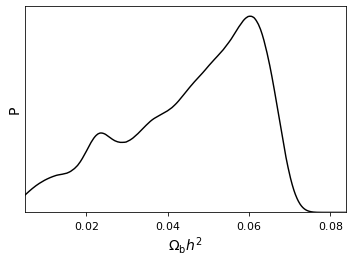

In [10]:
%matplotlib inline
g = plots.get_single_plotter(width_inch=5)
g.plot_1d(samples, 'ombh2', normalized=True, 
)

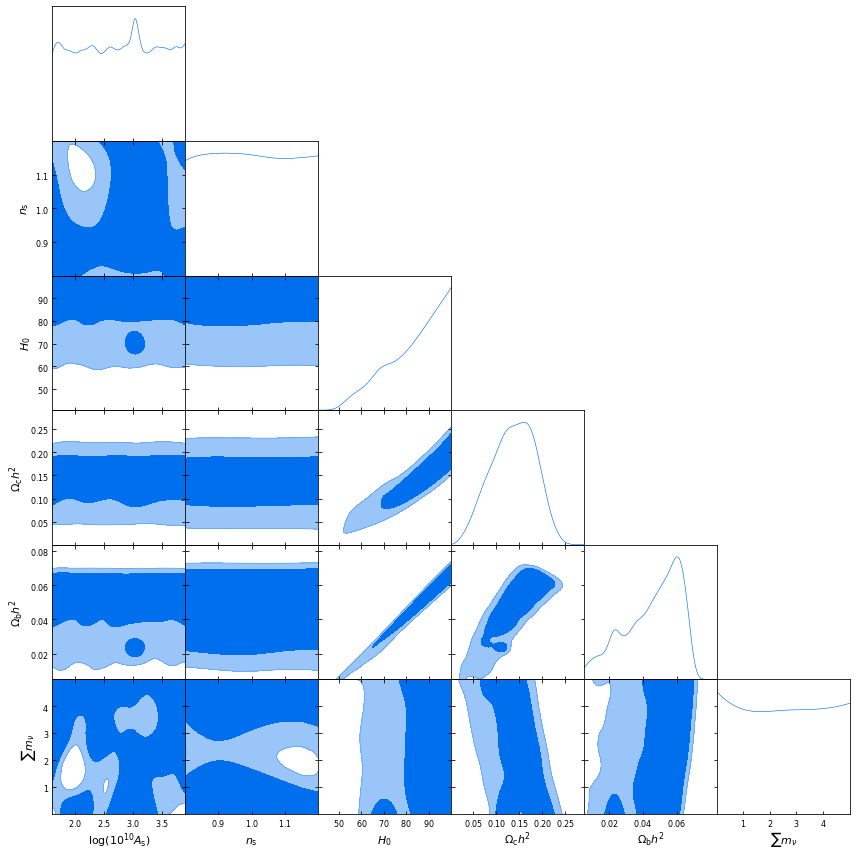

In [16]:
g = plots.get_subplot_plotter()
g.triangle_plot(samples, ['logA','ns','H0','omch2', 'ombh2','mnu'],filled=True)

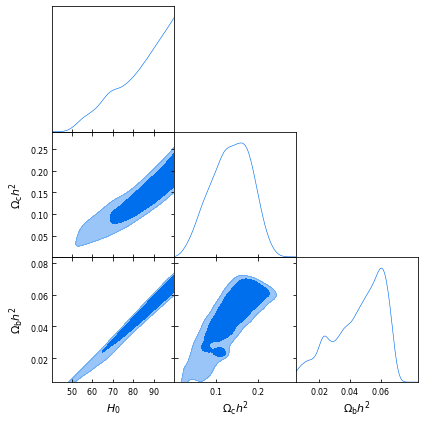

In [17]:
g = plots.get_subplot_plotter()
g.triangle_plot(samples, ['H0','omch2', 'ombh2'],filled=True)